In [1]:
import pandas as pd
import numpy as np
import networkx as nx
import sys
from matplotlib.colors import to_rgba
# adding Folder_2/subfolder to the system path
sys.path.insert(0, '/work/ccnr/glover.co/net_design/NetDesign')
import network_design as nd
import netrd
import matplotlib.pyplot as plt

In [2]:
# Read in dataset
df = pd.read_csv('../../data/protein_complex/corum_hint_combined.txt',index_col=False)

In [3]:
# Make networks
complex_ids = pd.unique(df['complex_id'])

In [4]:
distinct_complexes = {}

In [5]:
for i in complex_ids:
    # Get rows
    cur_id = df[df.complex_id == i]
    g = nx.Graph()
    for index, row in cur_id.iterrows():
        g.add_edge(row['Uniprot_A'],row['Uniprot_B'])
    if g.number_of_nodes() == 0:
        continue
    distinct_complexes[i] = g

In [6]:
# Dataset statistics
number_of_complexes = len(distinct_complexes.keys())
size_of_complexes = np.zeros(number_of_complexes)
avg_k = np.zeros(number_of_complexes)
cc = np.zeros(number_of_complexes)


In [7]:
for idx, i in enumerate(distinct_complexes.keys()):
    # Get network
    g = distinct_complexes[i]
    size_of_complexes[idx] = g.number_of_nodes()
    avg_k[idx] = 2*g.number_of_edges()/g.number_of_nodes()
    cc[idx] = nx.average_clustering(g)

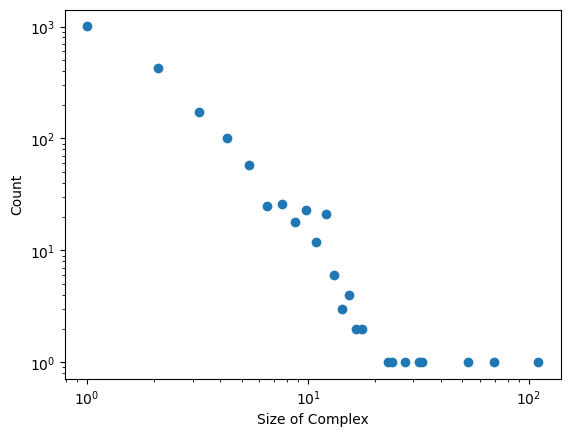

In [8]:
y, x = np.histogram(size_of_complexes,bins=100)
plt.loglog(x[:-1],y,'o')
plt.xlabel('Size of Complex')
plt.ylabel('Count')
plt.savefig('figs/size.pdf')
plt.show()

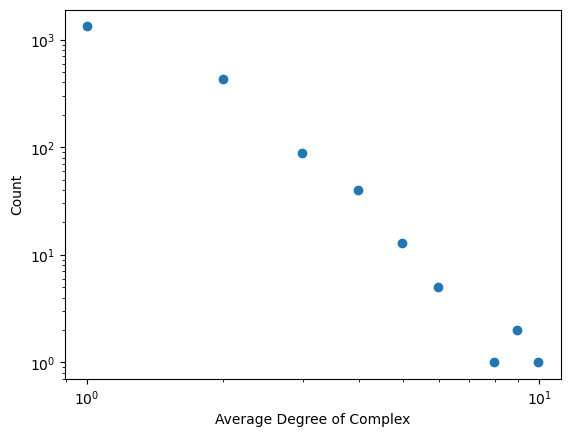

In [9]:
y, x = np.histogram(avg_k,bins=10)
plt.loglog(x[:-1],y,'o')
plt.xlabel('Average Degree of Complex')
plt.ylabel('Count')
plt.savefig('figs/avg_k.pdf')
# plt.loglog(x[:-1],1000*x[:-1]**(-3),'--')
plt.show()

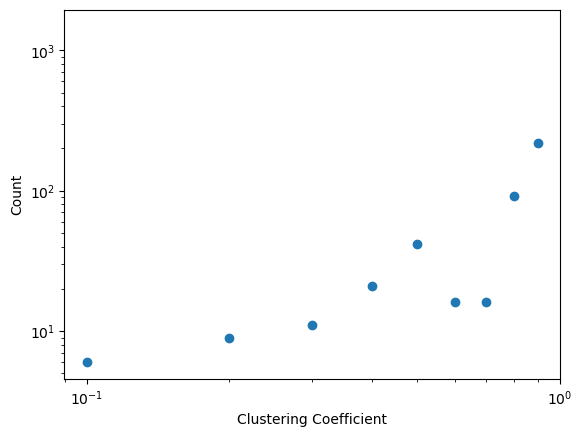

In [10]:
y, x = np.histogram(cc,bins=10)
plt.loglog(x[:-1],y,'o')
plt.xlabel('Clustering Coefficient')
plt.ylabel('Count')
plt.savefig('figs/cc.pdf')
plt.show()

# Compare true network with reconstructed network

In [11]:
graphs = {}
for i in complex_ids:
    try:
        graphs[i] = nx.read_edgelist(f'../../data/protein_complex/graphs/g_{i}.txt')
    except:
        continue

In [12]:
reconstructed_graphs_01 = {}
for i in complex_ids:
    try:
        reconstructed_graphs_01[i] = nx.read_edgelist(f'../../data/protein_complex/reconstructed_graphs/01_g_{i}.txt')
    except:
        continue

In [13]:
reconstructed_graphs_1 = {}
for i in complex_ids:
    try:
        reconstructed_graphs_1[i] = nx.read_edgelist(f'../../data/protein_complex/reconstructed_graphs/1_g_{i}.txt')
    except:
        continue

In [17]:
connected_components_01 = np.zeros(len(complex_ids))
connected_components_1 = np.zeros(len(complex_ids))
counter = 0
node_count = np.zeros(len(complex_ids))
graphs_large = []
for idx, i in enumerate(complex_ids):
    try:
        g = graphs[i]
        if g.number_of_nodes() <= 2:
            continue
        recon_01 = reconstructed_graphs_01[i]
        recon_1 = reconstructed_graphs_1[i]
        connected_components = list(nx.connected_components(recon_01))
        for c in connected_components:
            if nx.is_isomorphic(nx.subgraph(recon_01,c),g):
                connected_components_01[idx] += 1
        connected_components = list(nx.connected_components(recon_1))
        for c in connected_components:
            if nx.is_isomorphic(nx.subgraph(recon_1,c),g):
                connected_components_1[idx] += 1
        node_count[idx] = g.number_of_edges()*2/g.number_of_nodes()
        counter+=1
        graphs_large.append(i)
    except:
        continue
con_comp_01_large = connected_components_01[:counter]
con_comp_1_large = connected_components_1[:counter]

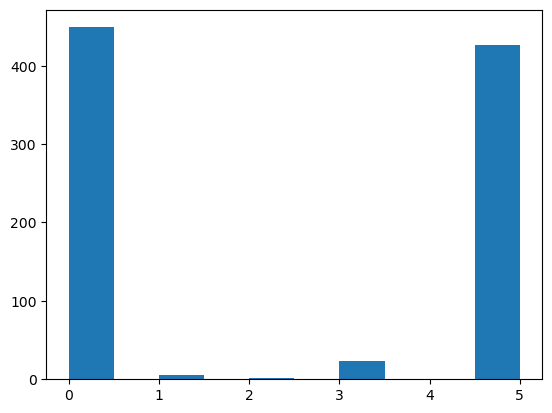

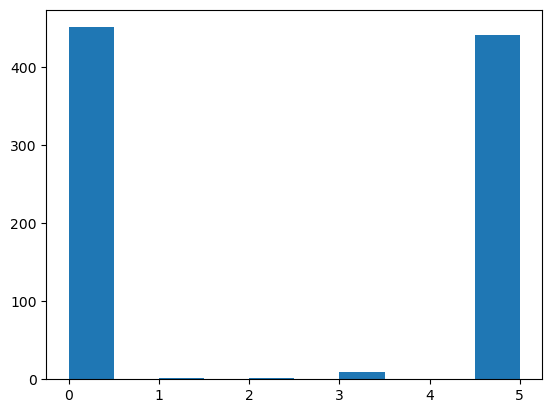

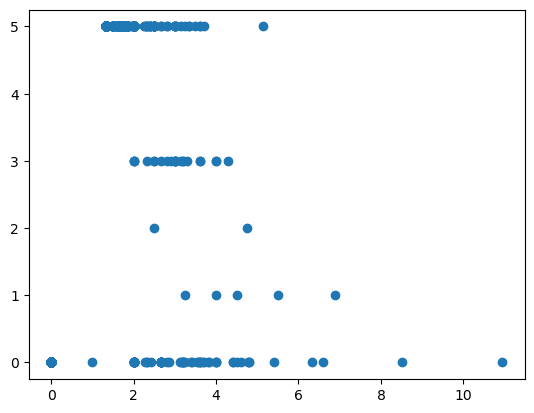

In [15]:
plt.hist(connected_components_1[:counter])
plt.show()
plt.hist(connected_components_01[:counter])
plt.show()
plt.plot(node_count[:counter],connected_components_1[:counter],'o')

In [31]:
g = graphs[graphs_large[0]]

In [32]:
recon_01 = reconstructed_graphs_1[graphs_large[0]]

In [33]:
connected_components = list(nx.connected_components(recon_01))
for c in connected_components:
    if nx.is_isomorphic(nx.subgraph(recon_01,c),g):
        print('here')

here
here
here
here
here


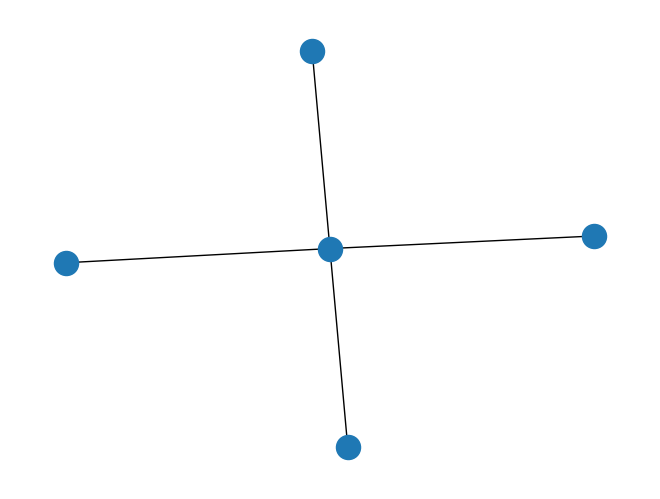

In [34]:
nx.draw(nx.subgraph(recon_01,c))